# Analysis Of KKR vs RR

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
Matches=pd.read_csv("matches.csv")

In [6]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?#  

In [7]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [8]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [9]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [11]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

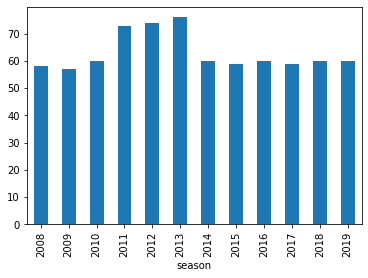

In [12]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [13]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [14]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.#  

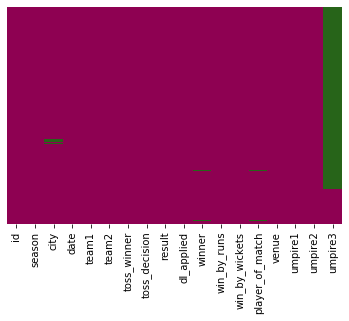

In [15]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Removed the columns containing more missing values and have less impact on the predicting matches


In [16]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [17]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

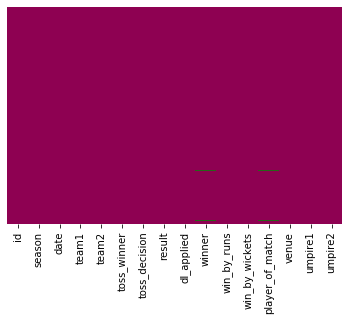

In [18]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Today's match is between Rajastan Royals(RR) and Kolkata knight riders(KKR).so we only want information between the matches that had take place between them.

In [19]:
KKR_RR1=Matches.loc[(Matches['team1']=='Rajasthan Royals')&(Matches['team2'] =='Kolkata Knight Riders')]
KKR_RR1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
77,78,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
167,168,2009,Durban,2009-05-20,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,LR Shukla,Kingsmead,BG Jerling,SJA Taufel,NaN
186,187,2010,Ahmedabad,2010-03-20,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,34,0,AA Jhunjhunwala,"Sardar Patel Stadium, Motera",RE Koertzen,RB Tiffin,NaN
226,227,2010,Kolkata,2010-04-17,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Kolkata Knight Riders,0,8,JD Unadkat,Eden Gardens,BG Jerling,RB Tiffin,NaN
245,246,2011,Jaipur,2011-04-15,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,9,G Gambhir,Sawai Mansingh Stadium,Aleem Dar,SS Hazare,NaN
250,251,2011,Kolkata,2011-04-17,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,L Balaji,Eden Gardens,Aleem Dar,RB Tiffin,NaN
313,314,2012,Jaipur,2012-04-08,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Rajasthan Royals,22,0,BJ Hodge,Sawai Mansingh Stadium,BF Bowden,VA Kulkarni,NaN
321,322,2012,Kolkata,2012-04-13,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Kolkata Knight Riders,0,5,Shakib Al Hasan,Eden Gardens,Asad Rauf,S Asnani,NaN
388,389,2013,Jaipur,2013-04-08,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Rajasthan Royals,19,0,SK Trivedi,Sawai Mansingh Stadium,Aleem Dar,S Das,NaN


In [20]:
KKR_RR2=Matches.loc[(Matches['team2']=='Rajasthan Royals')&(Matches['team1'] =='Kolkata Knight Riders')]

In [21]:
KKR_RR2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
104,105,2008,Kolkata,2008-05-20,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,YK Pathan,Eden Gardens,BG Jerling,RE Koertzen,NaN
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
738,11334,2019,Kolkata,25/04/19,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,VR Aaron,Eden Gardens,Ian Gould,Anil Dandekar,Nitin Menon


In [22]:
KKR_RR=KKR_RR1.append(KKR_RR2)

In [23]:
KKR_RR

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
77,78,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
167,168,2009,Durban,2009-05-20,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,LR Shukla,Kingsmead,BG Jerling,SJA Taufel,NaN
186,187,2010,Ahmedabad,2010-03-20,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,34,0,AA Jhunjhunwala,"Sardar Patel Stadium, Motera",RE Koertzen,RB Tiffin,NaN
226,227,2010,Kolkata,2010-04-17,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Kolkata Knight Riders,0,8,JD Unadkat,Eden Gardens,BG Jerling,RB Tiffin,NaN
245,246,2011,Jaipur,2011-04-15,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,9,G Gambhir,Sawai Mansingh Stadium,Aleem Dar,SS Hazare,NaN
250,251,2011,Kolkata,2011-04-17,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,L Balaji,Eden Gardens,Aleem Dar,RB Tiffin,NaN
313,314,2012,Jaipur,2012-04-08,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Rajasthan Royals,22,0,BJ Hodge,Sawai Mansingh Stadium,BF Bowden,VA Kulkarni,NaN
321,322,2012,Kolkata,2012-04-13,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Kolkata Knight Riders,0,5,Shakib Al Hasan,Eden Gardens,Asad Rauf,S Asnani,NaN
388,389,2013,Jaipur,2013-04-08,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Rajasthan Royals,19,0,SK Trivedi,Sawai Mansingh Stadium,Aleem Dar,S Das,NaN


In [24]:
KKR_RR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 77 to 738
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               20 non-null     int64 
 1   season           20 non-null     int64 
 2   city             20 non-null     object
 3   date             20 non-null     object
 4   team1            20 non-null     object
 5   team2            20 non-null     object
 6   toss_winner      20 non-null     object
 7   toss_decision    20 non-null     object
 8   result           20 non-null     object
 9   dl_applied       20 non-null     int64 
 10  winner           20 non-null     object
 11  win_by_runs      20 non-null     int64 
 12  win_by_wickets   20 non-null     int64 
 13  player_of_match  20 non-null     object
 14  venue            20 non-null     object
 15  umpire1          20 non-null     object
 16  umpire2          20 non-null     object
 17  umpire3          5 non-null      ob

# # Complete details of matches that takes placed between KKR and RR

In [25]:
KKR_RR.describe

<bound method NDFrame.describe of         id  season       city        date                  team1  \
77      78    2008     Jaipur  2008-05-01       Rajasthan Royals   
125    126    2009  Cape Town  2009-04-23       Rajasthan Royals   
167    168    2009     Durban  2009-05-20       Rajasthan Royals   
186    187    2010  Ahmedabad  2010-03-20       Rajasthan Royals   
226    227    2010    Kolkata  2010-04-17       Rajasthan Royals   
245    246    2011     Jaipur  2011-04-15       Rajasthan Royals   
250    251    2011    Kolkata  2011-04-17       Rajasthan Royals   
313    314    2012     Jaipur  2012-04-08       Rajasthan Royals   
321    322    2012    Kolkata  2012-04-13       Rajasthan Royals   
388    389    2013     Jaipur  2013-04-08       Rajasthan Royals   
426    427    2013    Kolkata  2013-05-03       Rajasthan Royals   
475    476    2014  Abu Dhabi  2014-04-29       Rajasthan Royals   
481    482    2014  Ahmedabad  2014-05-05       Rajasthan Royals   
569    570    

In [26]:
print("No of matches that takes place between KXIP and DC:",len(KKR_RR))

No of matches that takes place between KXIP and DC: 20


#  Below plot gives the details of the match that takes place between RR and KKR

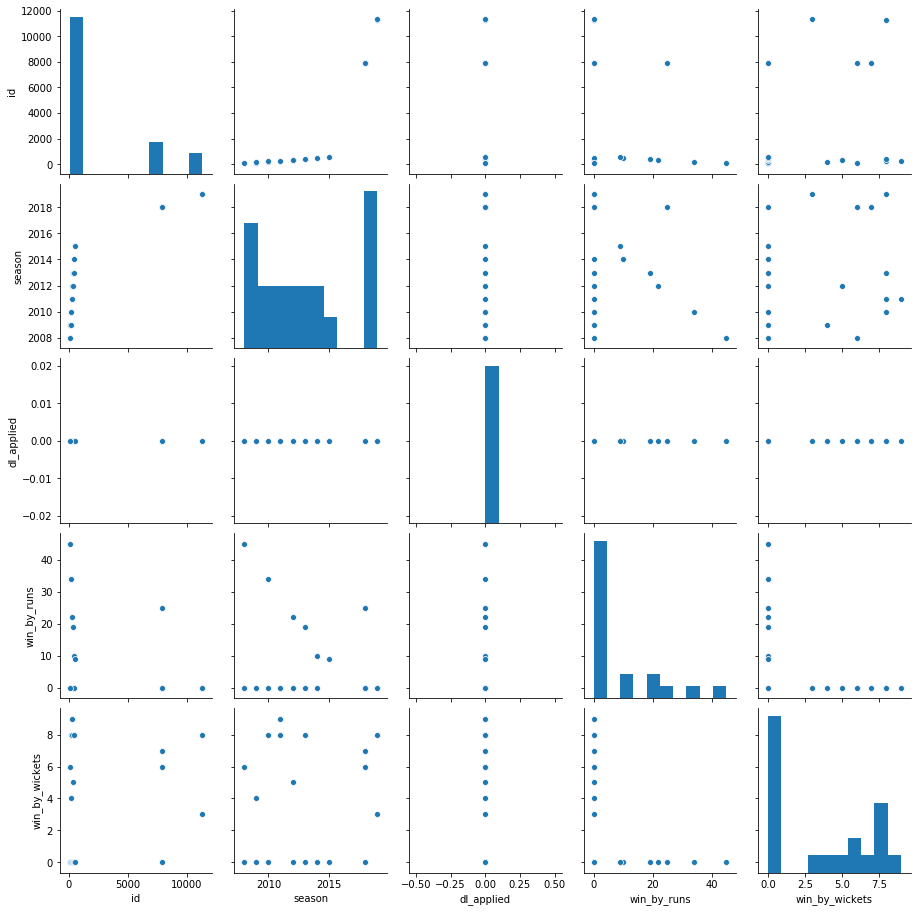

In [27]:
sns.pairplot(KKR_RR)

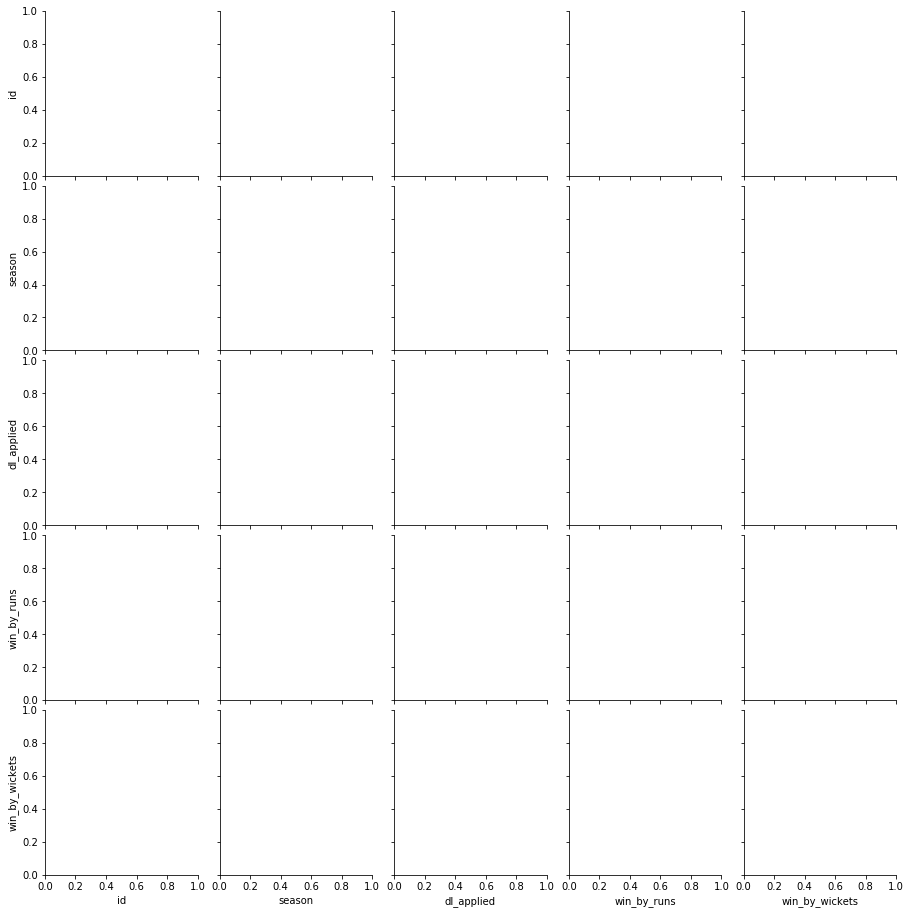

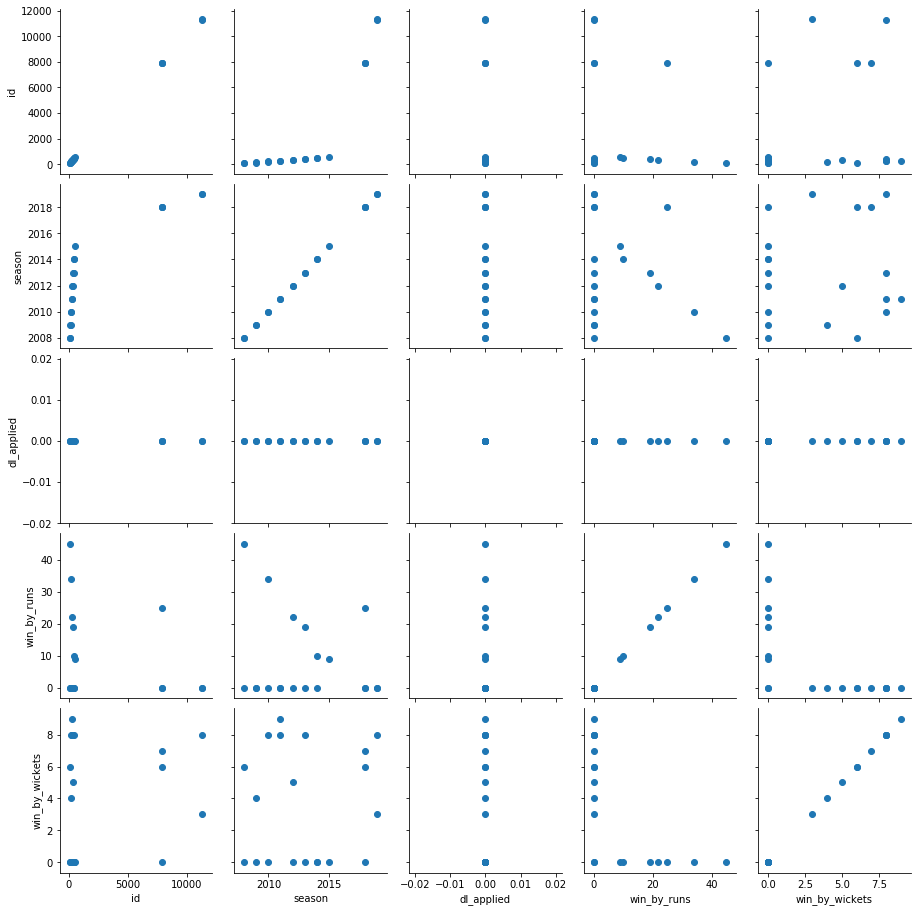

In [28]:
sns.PairGrid(KKR_RR)
g=sns.PairGrid(KKR_RR)
g.map(plt.scatter)

#  It looks like  KKR win the Toss 10 Times and 10 Times RR won the Toss

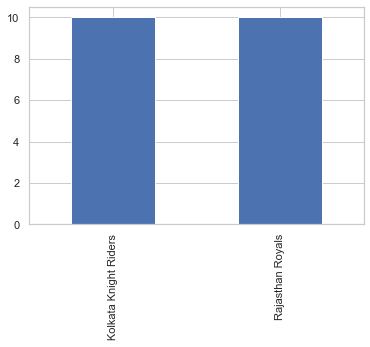

In [30]:
sns.set()
sns.set_style('whitegrid')
KKR_RR['toss_winner'].value_counts().plot(kind='bar')

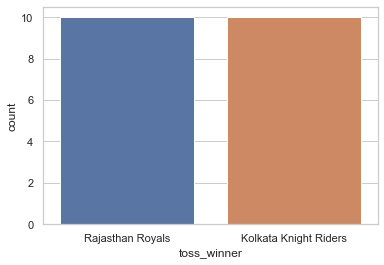

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='toss_winner',data=KKR_RR)

# RR went on to win the match 4 times by  batting first and 6 times by Batting Second against KKR .so total it is (RR=win-10,loss-10)whereas for KKR they win the match 3 time by batting first and win 7 times by batting first against RR.so it is (KXIP=win-10,loss=10)

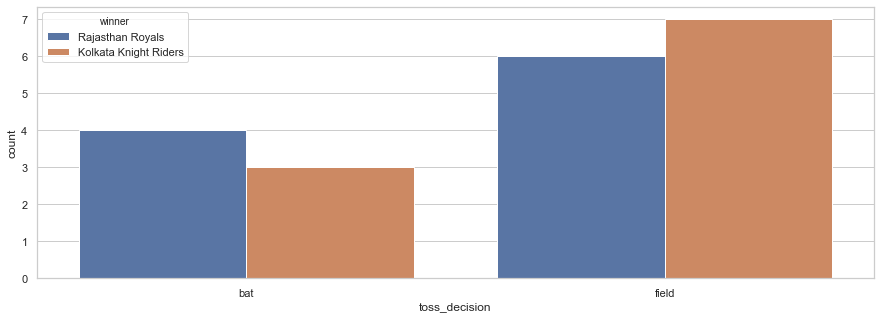

In [36]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.set_style('whitegrid')
sns.countplot(x='toss_decision',hue="winner",data=KKR_RR)

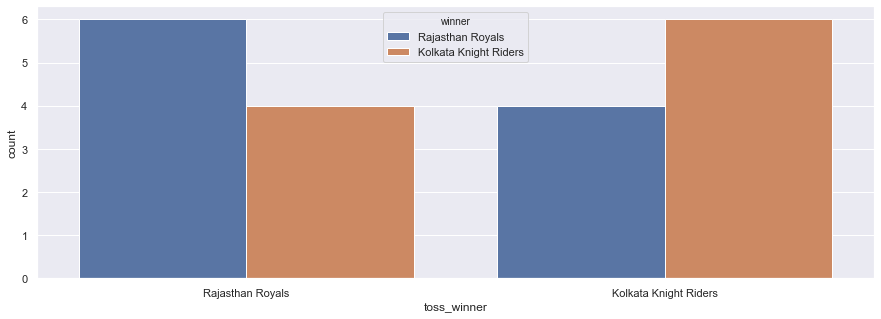

In [37]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=KKR_RR)

In [38]:
print("No of times toss won by both teams:")
KKR_RR['toss_winner'].value_counts()

No of times toss won by both teams:


Kolkata Knight Riders    10
Rajasthan Royals         10
Name: toss_winner, dtype: int64

# Both teams win 10 times each from 20 matches

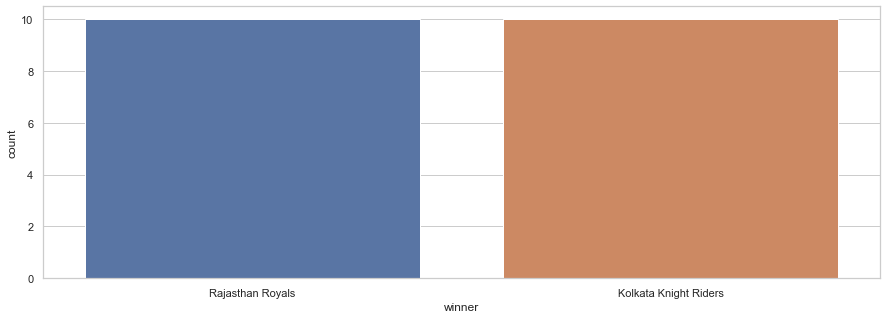

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='winner',data=KKR_RR)

# correlation between Columns in Matches Dataset

In [40]:
KKR_RR.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.863096,NaN,-0.174604,0.202509
season,0.863096,1.000000,NaN,-0.213246,0.071938
dl_applied,NaN,NaN,NaN,NaN,NaN
win_by_runs,-0.174604,-0.213246,NaN,1.000000,-0.633845
win_by_wickets,0.202509,0.071938,NaN,-0.633845,1.000000


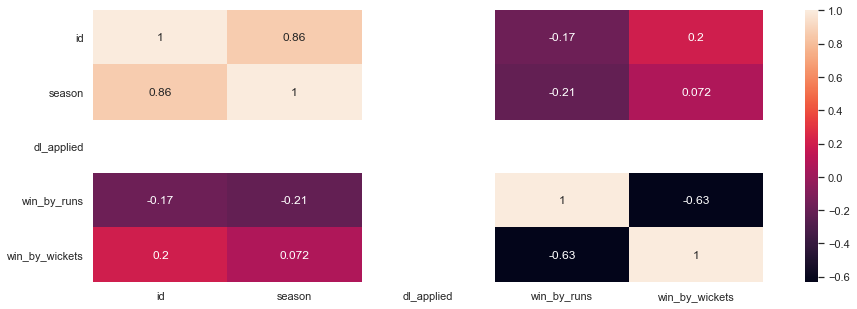

In [41]:
sns.heatmap(KKR_RR.corr(),yticklabels=True,annot=True)

In [42]:
KKR_RR['winner']=pd.get_dummies(KKR_RR['winner'])

In [43]:
KKR_RR.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
77,78,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,0,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,0,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN


# Using Sweetviz we can get details about the Matches

In [44]:
import sweetviz 
my_report=sweetviz.analyze([KKR_RR,'KKR_RR'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [45]:
my_report.show_html("Report1.html")

#  Now let get into the Deliveries Dataset

In [46]:
Deliveries=pd.read_csv("deliveries.csv")

In [47]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [48]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [49]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Filtering the match details that only takes place between Rajatsn Royals and  kolkata Knight Riders

In [50]:
Rajastan_Kolkata1=Deliveries.loc[(Deliveries['batting_team' ] =='Kolkata Knight Riders' ) & (Deliveries['bowling_team'] == 'Rajasthan Royals')]

In [51]:
Rajastan_Kolkata1         

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
18250,78,2,Kolkata Knight Riders,Rajasthan Royals,1,1,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
18251,78,2,Kolkata Knight Riders,Rajasthan Royals,1,2,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
18252,78,2,Kolkata Knight Riders,Rajasthan Royals,1,3,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
18253,78,2,Kolkata Knight Riders,Rajasthan Royals,1,4,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
18254,78,2,Kolkata Knight Riders,Rajasthan Royals,1,5,SC Ganguly,Salman Butt,SR Watson,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175062,11334,1,Kolkata Knight Riders,Rajasthan Royals,20,2,KD Karthik,R Singh,JD Unadkat,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175063,11334,1,Kolkata Knight Riders,Rajasthan Royals,20,3,KD Karthik,R Singh,JD Unadkat,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
175064,11334,1,Kolkata Knight Riders,Rajasthan Royals,20,4,KD Karthik,R Singh,JD Unadkat,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175065,11334,1,Kolkata Knight Riders,Rajasthan Royals,20,5,KD Karthik,R Singh,JD Unadkat,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [53]:
Rajastan_Kolkata2=Deliveries.loc[(Deliveries['bowling_team' ] =='Kolkata Knight Riders' ) & (Deliveries['batting_team'] == 'Rajasthan Royals')]

In [54]:
Rajastan_Kolkata2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
18123,78,1,Rajasthan Royals,Kolkata Knight Riders,1,1,GC Smith,SA Asnodkar,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
18124,78,1,Rajasthan Royals,Kolkata Knight Riders,1,2,GC Smith,SA Asnodkar,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
18125,78,1,Rajasthan Royals,Kolkata Knight Riders,1,3,GC Smith,SA Asnodkar,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
18126,78,1,Rajasthan Royals,Kolkata Knight Riders,1,4,SA Asnodkar,GC Smith,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
18127,78,1,Rajasthan Royals,Kolkata Knight Riders,1,5,SA Asnodkar,GC Smith,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175183,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,4,R Parag,J Archer,AD Russell,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
175184,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,5,R Parag,J Archer,AD Russell,0,...,0,0,0,0,0,0,0,R Parag,hit wicket,NaN
175185,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,6,JD Unadkat,J Archer,AD Russell,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175186,11334,2,Rajasthan Royals,Kolkata Knight Riders,20,1,J Archer,JD Unadkat,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [55]:
Rajastan_Kolkata=Rajastan_Kolkata1.append(Rajastan_Kolkata2)

# Complete Details Of Rajastan vs Kolkata

In [56]:
Rajastan_Kolkata

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
18250,78,2,Kolkata Knight Riders,Rajasthan Royals,1,1,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
18251,78,2,Kolkata Knight Riders,Rajasthan Royals,1,2,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
18252,78,2,Kolkata Knight Riders,Rajasthan Royals,1,3,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
18253,78,2,Kolkata Knight Riders,Rajasthan Royals,1,4,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
18254,78,2,Kolkata Knight Riders,Rajasthan Royals,1,5,SC Ganguly,Salman Butt,SR Watson,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175183,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,4,R Parag,J Archer,AD Russell,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
175184,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,5,R Parag,J Archer,AD Russell,0,...,0,0,0,0,0,0,0,R Parag,hit wicket,NaN
175185,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,6,JD Unadkat,J Archer,AD Russell,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175186,11334,2,Rajasthan Royals,Kolkata Knight Riders,20,1,J Archer,JD Unadkat,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


# using Match_id we can summarize that 20 matches were played between KKR and RR

In [57]:
Rajastan_Kolkata['match_id'].value_counts()

126      267
476      262
570      259
78       249
482      249
314      248
7951     247
322      246
187      244
11334    244
246      242
389      242
168      242
7908     239
427      234
227      225
7942     224
105      224
11312    211
251      185
Name: match_id, dtype: int64

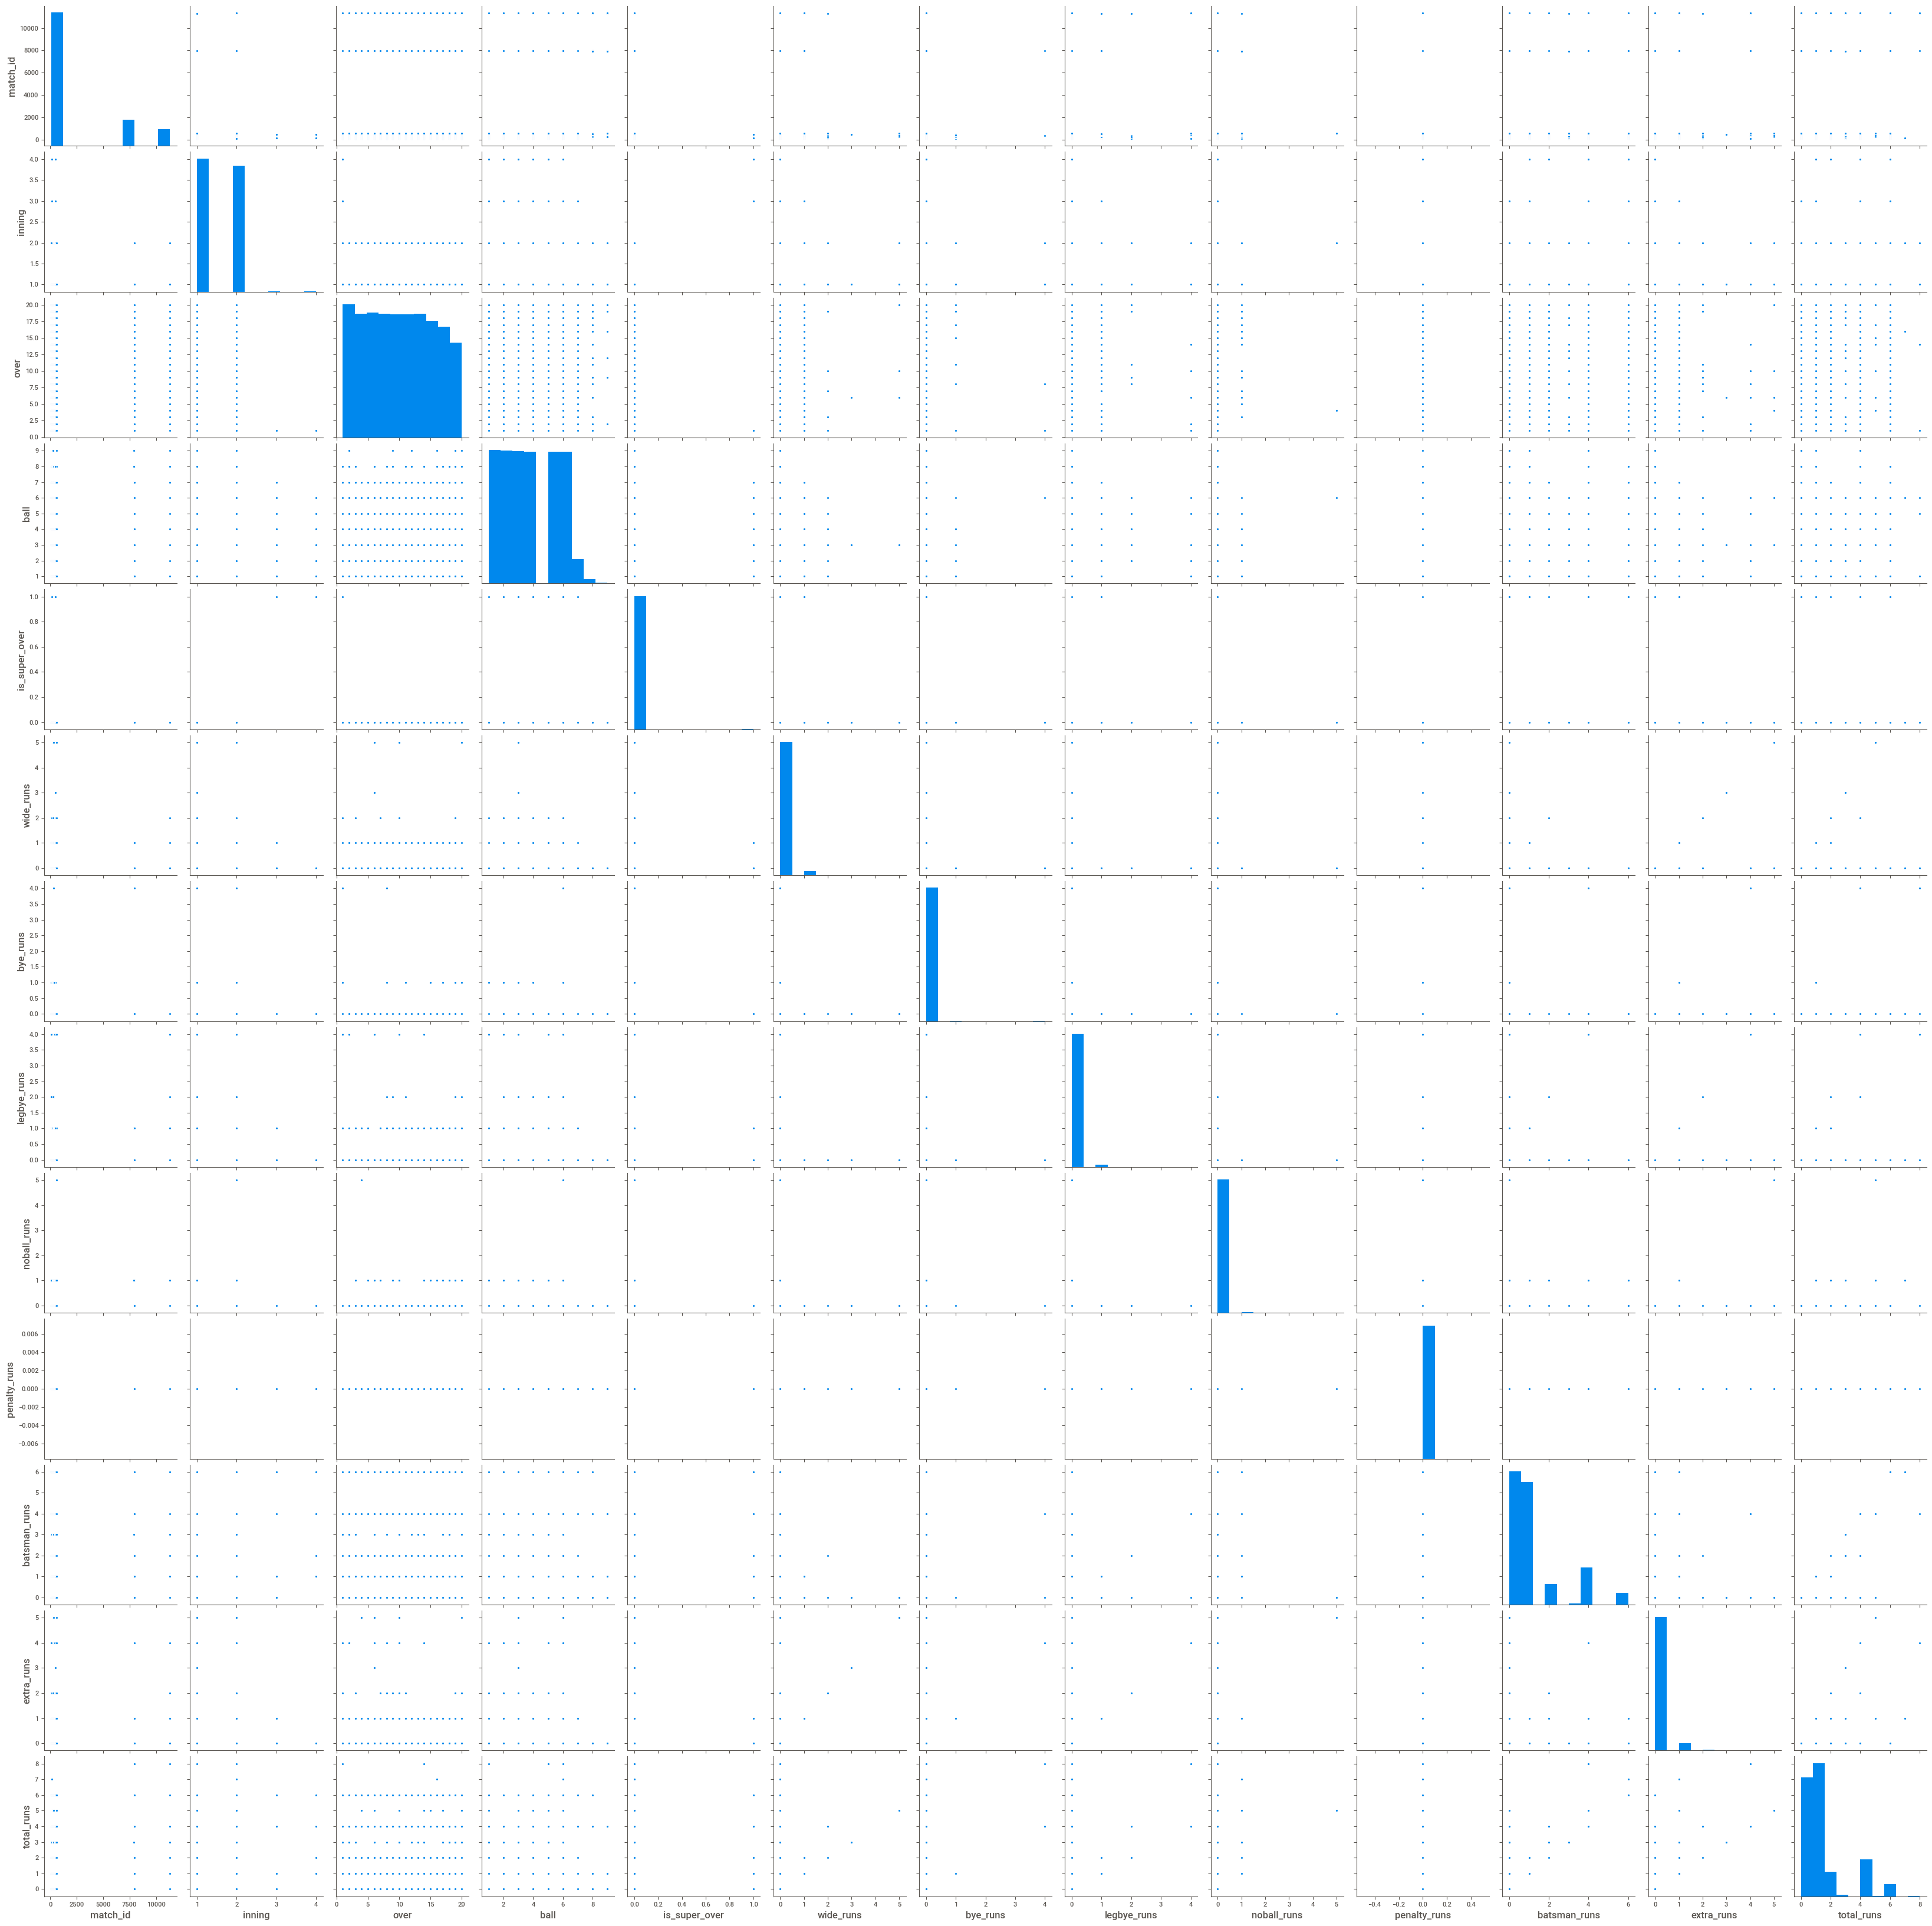

In [58]:
sns.pairplot(Rajastan_Kolkata)

# It is difficult to interpret covariance.Let's try correlation

In [59]:
Rajastan_Kolkata.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.549019e+07,-51.926500,23.584749,-60.728007,-10.430489,-27.581622,-3.371207,2.617832,-3.215663,0.0,348.473511,-31.550660,316.922851
inning,-5.192650e+01,0.268014,-0.229059,0.000756,0.009328,0.002266,0.000125,0.000839,-0.000180,0.0,0.010065,0.003051,0.013116
over,2.358475e+01,-0.229059,32.190656,0.003036,-0.043745,-0.007723,0.004392,-0.002168,0.019269,0.0,0.519339,0.013770,0.533108
ball,-6.072801e+01,0.000756,0.003036,3.307420,-0.000717,-0.008298,0.004982,0.000964,0.004010,0.0,0.009225,0.001658,0.010883
is_super_over,-1.043049e+01,0.009328,-0.043745,-0.000717,0.004787,0.000030,-0.000021,0.000100,-0.000030,0.0,0.005391,0.000078,0.005469
wide_runs,-2.758162e+01,0.002266,-0.007723,-0.008298,0.000030,0.054240,-0.000163,-0.000848,-0.000233,0.0,-0.037991,0.052995,0.015003
bye_runs,-3.371207e+00,0.000125,0.004392,0.004982,-0.000021,-0.000163,0.009391,-0.000100,-0.000028,0.0,-0.001852,0.009100,0.007248
legbye_runs,2.617832e+00,0.000839,-0.002168,0.000964,0.000100,-0.000848,-0.000100,0.040258,-0.000143,0.0,-0.016522,0.039167,0.022645
noball_runs,-3.215663e+00,-0.000180,0.019269,0.004010,-0.000030,-0.000233,-0.000028,-0.000143,0.010417,0.0,-0.000524,0.010013,0.009488
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [60]:
Rajastan_Kolkata.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,-0.025485,0.001056,-0.008484,-0.038306,-0.030091,-0.008839,0.003315,-0.008005,NaN,0.057353,-0.024032,0.052187
inning,-0.025485,1.000000,-0.077984,0.000803,0.260444,0.018796,0.002496,0.008078,-0.003399,NaN,0.012593,0.017667,0.016420
over,0.001056,-0.077984,1.000000,0.000294,-0.111442,-0.005845,0.007988,-0.001905,0.033277,NaN,0.059292,0.007275,0.060896
ball,-0.008484,0.000803,0.000294,1.000000,-0.005702,-0.019592,0.028269,0.002642,0.021606,NaN,0.003286,0.002733,0.003878
is_super_over,-0.038306,0.260444,-0.111442,-0.005702,1.000000,0.001870,-0.003150,0.007168,-0.004272,NaN,0.050471,0.003395,0.051231
wide_runs,-0.030091,0.018796,-0.005845,-0.019592,0.001870,1.000000,-0.007241,-0.018153,-0.009822,NaN,-0.105667,0.682144,0.041751
bye_runs,-0.008839,0.002496,0.007988,0.028269,-0.003150,-0.007241,1.000000,-0.005147,-0.002785,NaN,-0.012377,0.281505,0.048475
legbye_runs,0.003315,0.008078,-0.001905,0.002642,0.007168,-0.018153,-0.005147,1.000000,-0.006981,NaN,-0.053340,0.585188,0.073145
noball_runs,-0.008005,-0.003399,0.033277,0.021606,-0.004272,-0.009822,-0.002785,-0.006981,1.000000,NaN,-0.003327,0.294093,0.060251
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

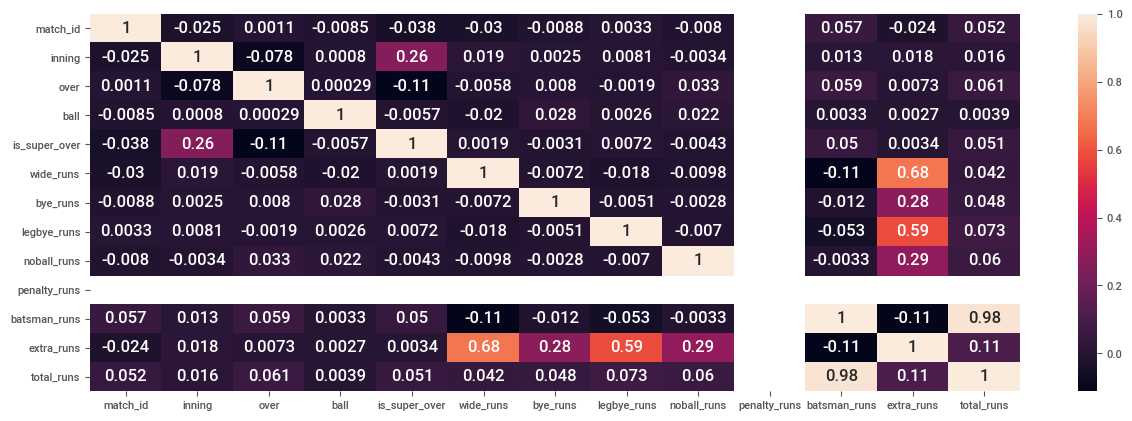

In [61]:
sns.heatmap(Rajastan_Kolkata.corr(),yticklabels=True,annot=True)

In [62]:
Rajastan_Kolkata.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.0,4783.000000,4783.000000,4783.000000
mean,2477.243362,1.495296,10.095129,3.627430,0.004809,0.037215,0.004391,0.022789,0.006272,0.0,1.183567,0.070667,1.254234
std,3935.758128,0.517701,5.673681,1.818631,0.069185,0.232895,0.096907,0.200645,0.102061,0.0,1.543786,0.333578,1.542975
min,78.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,187.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,389.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,570.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,11334.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,4.000000,5.000000,0.0,6.000000,5.000000,8.000000


In [63]:
Rajastan_Kolkata

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
18250,78,2,Kolkata Knight Riders,Rajasthan Royals,1,1,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
18251,78,2,Kolkata Knight Riders,Rajasthan Royals,1,2,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
18252,78,2,Kolkata Knight Riders,Rajasthan Royals,1,3,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
18253,78,2,Kolkata Knight Riders,Rajasthan Royals,1,4,Salman Butt,SC Ganguly,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
18254,78,2,Kolkata Knight Riders,Rajasthan Royals,1,5,SC Ganguly,Salman Butt,SR Watson,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175183,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,4,R Parag,J Archer,AD Russell,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
175184,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,5,R Parag,J Archer,AD Russell,0,...,0,0,0,0,0,0,0,R Parag,hit wicket,NaN
175185,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,6,JD Unadkat,J Archer,AD Russell,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175186,11334,2,Rajasthan Royals,Kolkata Knight Riders,20,1,J Archer,JD Unadkat,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [64]:
RR_KKR=sweetviz.analyze([Rajastan_Kolkata,'Rajastan_Kolkata'])

:FEATURES DONE:                    |                     | [  0%]   00:18  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!


In [65]:
RR_KKR.show_html()

# How many Wickets ll fall in total during the match?

In [66]:
Rajastan_Kolkata['dismissal_kind'].value_counts()

caught               128
bowled                52
run out               31
lbw                   15
stumped               13
caught and bowled      4
hit wicket             1
Name: dismissal_kind, dtype: int64

In [67]:
len(Rajastan_Kolkata['match_id'].value_counts())

20

In [70]:
Total_Wickets=244//20
Total_Wickets

12

In [71]:
print("Average number of wickets fall in a single match",Total_Wickets)

Average number of wickets fall in a single match 12


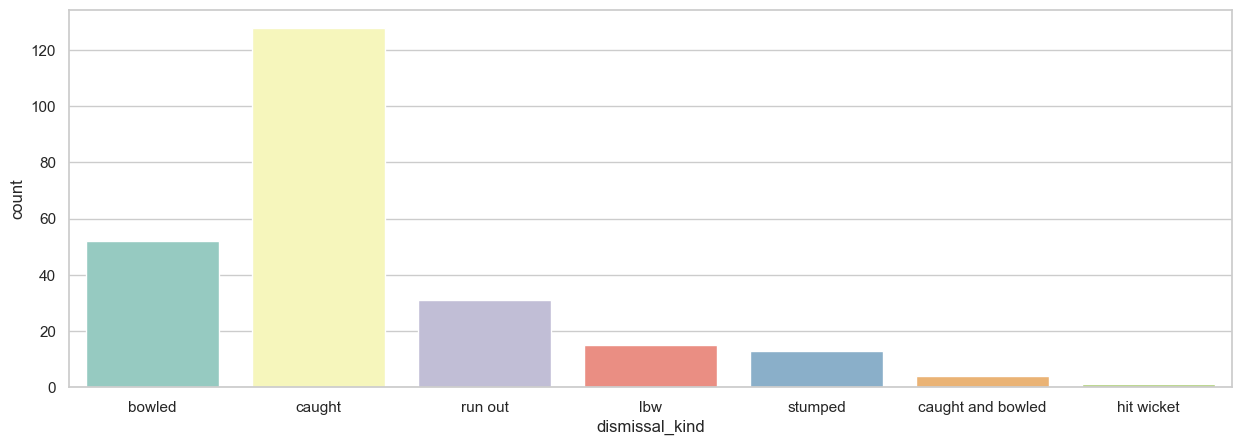

In [75]:
sns.set()
sns.set_style('whitegrid')
sns.countplot(x='dismissal_kind',palette='Set3',data=Rajastan_Kolkata)

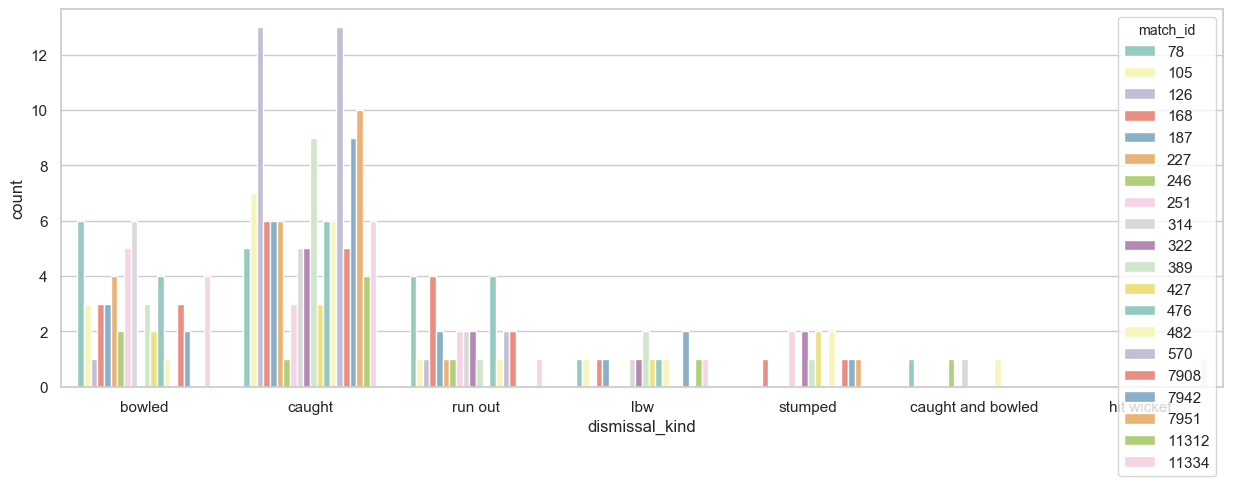

In [76]:
sns.countplot(x='dismissal_kind',hue='match_id',palette='Set3',data=Rajastan_Kolkata)

# Jofra Archer Economy and Boundary hits

In [86]:
Jofra_Archer_Economy_Boundary_hits=Rajastan_Kolkata1.loc[(Rajastan_Kolkata1['bowler']=='J Archer')]

In [87]:
Jofra_Archer_Economy_Boundary_hits

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
161943,7942,2,Kolkata Knight Riders,Rajasthan Royals,3,1,RV Uthappa,CA Lynn,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
161944,7942,2,Kolkata Knight Riders,Rajasthan Royals,3,2,RV Uthappa,CA Lynn,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
161945,7942,2,Kolkata Knight Riders,Rajasthan Royals,3,3,RV Uthappa,CA Lynn,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
161946,7942,2,Kolkata Knight Riders,Rajasthan Royals,3,4,CA Lynn,RV Uthappa,J Archer,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
161947,7942,2,Kolkata Knight Riders,Rajasthan Royals,3,5,CA Lynn,RV Uthappa,J Archer,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175056,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,2,R Singh,KD Karthik,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175057,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,3,KD Karthik,R Singh,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175058,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,4,R Singh,KD Karthik,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175059,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,5,KD Karthik,R Singh,J Archer,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [90]:
len(Jofra_Archer_Economy_Boundary_hits['match_id'].value_counts())

4

In [88]:
Jofra_Archer_Economy_Boundary_hits['total_runs'].value_counts()

0    45
1    25
4     9
6     8
2     8
Name: total_runs, dtype: int64

In [93]:
Jofra_Archer_Economy_Boundary_hits.groupby(['match_id','over']).size()

match_id  over
7942      3       6
          5       6
          14      6
          18      6
7951      2       9
          4       6
          15      7
          19      6
11312     3       6
          5       6
          12      6
11334     6       6
          12      6
          15      7
          19      6
dtype: int64

In [94]:
print("Average(MEAN)Boundaries Hit on Jofra Archer",17//4)

Average(MEAN)Boundaries Hit on Jofra Archer 4


In [92]:
print("Average(MEAN) Economy oF Jofra Archer in a single match",125//16)

Average(MEAN) Economy oF Jofra Archer in a single match 7


# How many bowlers ll have economy less than 8?

# R Tewatia Economy

In [164]:
R_Tewatia_Economy=Rajastan_Kolkata1.loc[(Rajastan_Kolkata1['bowler']=='R Tewatia')]

In [165]:
len(R_Tewatia_Economy['match_id'].value_counts())

1

In [166]:
R_Tewatia_Economy.groupby(['match_id','over']).size()

match_id  over
482       8       6
          11      6
dtype: int64

In [167]:
R_Tewatia_Economy['total_runs'].value_counts()

1    8
0    2
6    1
4    1
Name: total_runs, dtype: int64

In [168]:
print("Average(MEAN) Economy oF R Tewatia in a single match",18//2)

Average(MEAN) Economy oF R Tewatia in a single match 9


# Ben _stokes_Economy

In [172]:
Ben_stokes_Economy=Rajastan_Kolkata1.loc[(Rajastan_Kolkata1['bowler']=='BA Stokes')]

In [173]:
len(Ben_stokes_Economy['match_id'].value_counts())

3

In [174]:
Ben_stokes_Economy.groupby(['match_id','over']).size()

match_id  over
7908      8       6
          10      7
          18      6
7942      2       6
          4       6
          6       7
          16      6
11312     14      6
dtype: int64

In [192]:
Ben_stokes_Economy['over'].value_counts()

10    7
6     7
18    6
16    6
14    6
8     6
4     6
2     6
Name: over, dtype: int64

In [175]:
Ben_stokes_Economy['total_runs'].value_counts()

1    20
0    19
2     6
4     4
8     1
Name: total_runs, dtype: int64

In [177]:
Ben_stokes_Economy['total_runs'].sum()

56

In [179]:
print("Average(MEAN) Economy oF Ben stokes in a single match",56//7)

Average(MEAN) Economy oF Ben stokes in a single match 8


# varun_Chakravarthy_Economy

In [180]:
varun_Chakravarthy_Economy=Deliveries.loc[(Deliveries['bowler']=='V Chakravarthy')]

In [181]:
len(varun_Chakravarthy_Economy['match_id'].value_counts())

1

In [182]:
varun_Chakravarthy_Economy.groupby(['match_id','over']).size()

match_id  over
11142     2       6
          7       6
          15      6
dtype: int64

In [191]:
varun_Chakravarthy_Economy['over'].value_counts()

15    6
7     6
2     6
Name: over, dtype: int64

In [183]:
varun_Chakravarthy_Economy['total_runs'].sum()

35

In [184]:
print("Average(MEAN) Economy oF varun Chakravarthy in a single match",35//3)

Average(MEAN) Economy oF varun Chakravarthy in a single match 11


# Patt Cummins Economy

In [185]:
Patt_Cummins_Economy=Deliveries.loc[(Deliveries['bowler']=='PJ Cummins')]

In [186]:
len(Patt_Cummins_Economy['match_id'].value_counts())

16

In [187]:
Patt_Cummins_Economy.groupby(['match_id','over']).size()

match_id  over
5         3       7
          6       6
          12      6
          19      6
9         2       7
                 ..
547       3       6
          14      6
          18      8
550       1       8
          3       6
Length: 61, dtype: int64

In [190]:
Patt_Cummins_Economy['over'].value_counts()

18    45
6     43
3     31
13    25
16    24
8     24
1     22
20    21
19    20
2     19
12    18
11    18
17    14
10    13
5     12
9      6
14     6
7      6
15     6
4      6
Name: over, dtype: int64

In [188]:
Patt_Cummins_Economy['total_runs'].sum()

525

In [193]:
print("Average(MEAN) Economy oF Patt Cummins in a single match",525//63)

Average(MEAN) Economy oF Patt Cummins in a single match 8


# Sunil_Naraine_Economy

In [194]:
Sunil_Naraine_Economy=Deliveries.loc[(Deliveries['bowler']=='SP Narine')]

In [195]:
len(Sunil_Naraine_Economy['match_id'].value_counts())

109

In [196]:
Sunil_Naraine_Economy.groupby(['match_id','over']).size()

match_id  over
3         3       6
          5       6
          13      6
          15      6
7         5       6
                 ..
11343     17      6
11347     6       6
          8       6
          11      7
          14      6
Length: 429, dtype: int64

In [197]:
Sunil_Naraine_Economy['over'].value_counts()

5     301
17    217
6     213
18    197
15    195
16    179
14    175
19    147
11    145
12    132
4     116
13    108
10     97
7      90
9      73
20     68
8      67
2      43
3      25
1      12
Name: over, dtype: int64

In [198]:
Sunil_Naraine_Economy['total_runs'].sum()

2939

In [199]:
print("Average(MEAN) Economy oF Sunil Naraine in a single match",2939//433)

Average(MEAN) Economy oF Sunil Naraine in a single match 6


In [200]:
print("Average(MEAN) Economy oF Jofra Archer in a single match",125//16)#already found it

Average(MEAN) Economy oF Jofra Archer in a single match 7


# Kuldeep Yadav Economy

In [204]:
Kuldeep_Yadav_Economy=Deliveries.loc[(Deliveries['bowler']=='Kuldeep Yadav')]

In [205]:
len(Kuldeep_Yadav_Economy['match_id'].value_counts())

39

In [206]:
Kuldeep_Yadav_Economy.groupby(['match_id','over']).size()

match_id  over
3         7       6
          9       6
          11      6
          16      6
7         6       7
                 ..
11320     13      6
11326     8       6
          10      6
          14      6
          16      7
Length: 138, dtype: int64

In [207]:
Kuldeep_Yadav_Economy['over'].value_counts()

14    97
11    92
10    91
8     84
9     79
7     78
12    73
16    56
18    38
13    36
6     27
17    24
15    20
5     13
2     12
19     6
3      6
20     6
Name: over, dtype: int64

In [208]:
Kuldeep_Yadav_Economy['total_runs'].sum()

1173

In [209]:
print("Average(MEAN) Economy oF Kuldeep Yadav in a single match",1173//139)

Average(MEAN) Economy oF Kuldeep Yadav in a single match 8


# Shivam mavi Economy

In [212]:
shivam_mavi_Economy=Deliveries.loc[(Deliveries['bowler']=='S Mavi' )]

In [213]:
len(shivam_mavi_Economy['match_id'].value_counts())

9

In [214]:
shivam_mavi_Economy.groupby(['match_id','over']).size()

match_id  over
7903      15      6
7906      3       7
          5       6
7908      5       6
          9       6
          12      6
          20      9
7911      1       6
          3       7
          11      7
7919      4       6
          7       6
          17      7
          20      7
7922      6       6
          16      6
          19      7
7926      3       6
          9       6
          16      7
7942      1       6
          3       6
          13      6
          15      6
7952      1       7
          3       6
          5       6
          19      6
dtype: int64

In [215]:
shivam_mavi_Economy['over'].value_counts()

3     32
1     19
5     18
20    16
19    13
16    13
15    12
9     12
17     7
11     7
13     6
12     6
7      6
6      6
4      6
Name: over, dtype: int64

In [216]:
shivam_mavi_Economy['total_runs'].sum()

288

In [217]:
print("Average(MEAN) Economy oF shivam mavi in a single match",288//29)

Average(MEAN) Economy oF shivam mavi in a single match 9


# Shreyas Gopal Economy

In [218]:
Shreyas_Gopal_Economy=Deliveries.loc[(Deliveries['bowler']=='S Gopal' )]

In [219]:
len(Shreyas_Gopal_Economy['match_id'].value_counts())

30

In [220]:
Shreyas_Gopal_Economy.groupby(['match_id','over']).size()

match_id  over
501       9       7
          11      6
          13      6
          15      6
505       7       6
                 ..
11340     2       6
11344     5       6
          8       6
          12      6
          16      6
Length: 99, dtype: int64

In [221]:
Shreyas_Gopal_Economy['over'].value_counts()

9     85
11    78
8     73
7     72
13    60
12    37
10    36
16    36
15    30
14    30
17    13
4     12
6     12
3      6
2      6
5      6
20     1
Name: over, dtype: int64

In [222]:
Shreyas_Gopal_Economy['total_runs'].sum()

753

In [226]:
print("Average(MEAN) Economy oF Shreyas Gopal in a single match",753//98)

Average(MEAN) Economy oF Shreyas Gopal in a single match 7


In [229]:
print("Average(MEAN) Economy oF Shreyas Gopal in a single match",753//98)
print("Average(MEAN) Economy oF shivam mavi in a single match",288//29)
print("Average(MEAN) Economy oF Kuldeep Yadav in a single match",1173//139)
print("Average(MEAN) Economy oF Jofra Archer in a single match",125//16)
print("Average(MEAN) Economy oF Patt Cummins in a single match",525//63)
print("Average(MEAN) Economy oF Sunil Naraine in a single match",2939//433)
print("Average(MEAN) Economy oF varun Chakravarthy in a single match",35//3)
print("Average(MEAN) Economy oF R Tewatia in a single match",18//2)
print("Average(MEAN) Economy oF Ben stokes in a single match",56//7)

Average(MEAN) Economy oF Shreyas Gopal in a single match 7
Average(MEAN) Economy oF shivam mavi in a single match 9
Average(MEAN) Economy oF Kuldeep Yadav in a single match 8
Average(MEAN) Economy oF Jofra Archer in a single match 7
Average(MEAN) Economy oF Patt Cummins in a single match 8
Average(MEAN) Economy oF Sunil Naraine in a single match 6
Average(MEAN) Economy oF varun Chakravarthy in a single match 11
Average(MEAN) Economy oF R Tewatia in a single match 9
Average(MEAN) Economy oF Ben stokes in a single match 8


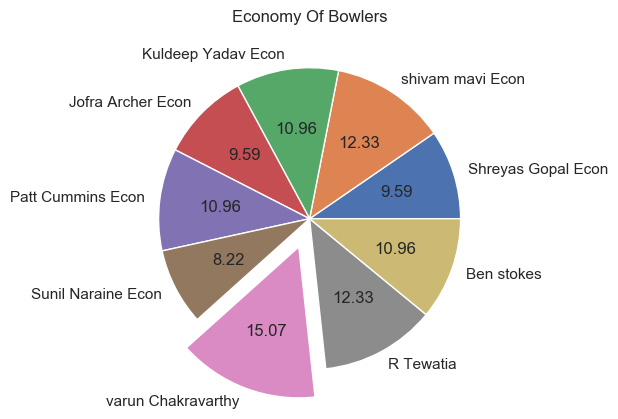

In [234]:
Values=[7,9,8,7,8,6,11,9,8]
explode=[0,0,0,0,0,0,0.2,0,0]
labels=['Shreyas Gopal Econ','shivam mavi Econ','Kuldeep Yadav Econ','Jofra Archer Econ','Patt Cummins Econ','Sunil Naraine Econ','varun Chakravarthy','R Tewatia','Ben stokes']
plt.pie(Values,labels=labels,explode=explode,autopct='%.2f')
plt.title("Economy Of Bowlers")
plt.show()

# Which batsman ll have the highest runs scored throught boundaries-runs scored off 1's,2's and 3's?

In [95]:
Ben_Stokes_Ratio=Deliveries.loc[(Deliveries['batsman']=='BA Stokes')]

In [100]:
len(Ben_Stokes_Ratio['match_id'].value_counts())

32

In [97]:
Ben_Stokes_Ratio['batsman_runs'].value_counts()

1    231
0    148
2     44
4     43
6     25
3      2
Name: batsman_runs, dtype: int64

In [101]:
Ben_Stokes_Total_Runs=((1*231)+(2*44)+(4*43)+(6*25)+(3*2))//32
Ben_Stokes_Total_Runs

20

In [113]:
Ben_Stokes_Boundary_Runs=((4*43)+(6*25))//32
Ben_Stokes_Boundary_Runs

10

In [114]:
print("Ben Stokes Runs scored ratio",Ben_Stokes_Boundary_Runs/Ben_Stokes_Total_Runs)

Ben Stokes Runs scored ratio 0.5


In [106]:
Samson_Ratio=Deliveries.loc[(Deliveries['batsman']=='SV Samson')]

In [107]:
Samson_Ratio

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1118,5,2,Delhi Daredevils,Royal Challengers Bangalore,6,4,SV Samson,SW Billings,B Stanlake,0,...,0,0,0,0,3,0,3,NaN,NaN,NaN
1120,5,2,Delhi Daredevils,Royal Challengers Bangalore,6,6,SV Samson,SW Billings,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1121,5,2,Delhi Daredevils,Royal Challengers Bangalore,7,1,SV Samson,SW Billings,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1123,5,2,Delhi Daredevils,Royal Challengers Bangalore,7,3,SV Samson,SW Billings,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1124,5,2,Delhi Daredevils,Royal Challengers Bangalore,7,4,SV Samson,SW Billings,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177187,11344,1,Rajasthan Royals,Delhi Capitals,3,7,SV Samson,L Livingstone,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177188,11344,1,Rajasthan Royals,Delhi Capitals,4,1,SV Samson,L Livingstone,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177189,11344,1,Rajasthan Royals,Delhi Capitals,4,2,SV Samson,L Livingstone,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177194,11344,1,Rajasthan Royals,Delhi Capitals,5,1,SV Samson,M Lomror,AR Patel,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [108]:
len(Samson_Ratio['match_id'].value_counts())

88

In [109]:
Samson_Ratio['batsman_runs'].value_counts()

1    712
0    609
4    171
2    136
6     89
3     11
Name: batsman_runs, dtype: int64

In [110]:
Samson_Ratio_Total_Runs=((1*712)+(2*136)+(4*171)+(6*89)+(3*11))//88
Samson_Ratio_Total_Runs

25

In [111]:
Samson_Ratio_Boundary_Runs=((4*171)+(6*89))//88
Samson_Ratio_Boundary_Runs

13

In [112]:
print("Samson Runs scored ratio",Samson_Ratio_Boundary_Runs/Samson_Ratio_Total_Runs)

Samson Runs scored ratio 0.52


# Nitish Rana Ratio

In [115]:
Nitish_Rana_Ratio=Deliveries.loc[(Deliveries['batsman']=='N Rana')]

In [116]:
Nitish_Rana_Ratio

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
288,2,1,Mumbai Indians,Rising Pune Supergiant,7,4,N Rana,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
292,2,1,Mumbai Indians,Rising Pune Supergiant,8,2,N Rana,AT Rayudu,BA Stokes,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
295,2,1,Mumbai Indians,Rising Pune Supergiant,8,5,N Rana,AT Rayudu,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
296,2,1,Mumbai Indians,Rising Pune Supergiant,8,6,N Rana,AT Rayudu,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
298,2,1,Mumbai Indians,Rising Pune Supergiant,9,2,N Rana,AT Rayudu,A Zampa,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177973,11347,1,Kolkata Knight Riders,Mumbai Indians,17,1,N Rana,RV Uthappa,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177974,11347,1,Kolkata Knight Riders,Mumbai Indians,17,2,N Rana,RV Uthappa,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177976,11347,1,Kolkata Knight Riders,Mumbai Indians,17,4,N Rana,RV Uthappa,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177979,11347,1,Kolkata Knight Riders,Mumbai Indians,18,1,N Rana,RV Uthappa,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [117]:
len(Nitish_Rana_Ratio['match_id'].value_counts())

41

In [118]:
Nitish_Rana_Ratio['batsman_runs'].value_counts()

0    329
1    322
4     85
6     60
2     37
5      1
3      1
Name: batsman_runs, dtype: int64

In [122]:
Nitish_Rana_Ratio_Total_Runs=((1*322)+(2*37)+(4*86)+(6*60)+(3*1))//41
Nitish_Rana_Ratio_Total_Runs

26

In [137]:
Nitish_Rana_Ratio_Boundary_Runs=((4*87)+(6*60))//41
Nitish_Rana_Ratio_Boundary_Runs

17

In [138]:
print("Nitish Rana Runs scored ratio",Nitish_Rana_Ratio_Boundary_Runs/Nitish_Rana_Ratio_Total_Runs)

Nitish Rana Runs scored ratio 0.6538461538461539


# Eoin Morgan Ratio

In [127]:
Eoin_Morgan_Ratio=Deliveries.loc[(Deliveries['batsman']=='EJG Morgan')]

In [128]:
Eoin_Morgan_Ratio

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
3465,15,2,Kings XI Punjab,Delhi Daredevils,4,3,EJG Morgan,HM Amla,S Nadeem,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3466,15,2,Kings XI Punjab,Delhi Daredevils,4,4,EJG Morgan,HM Amla,S Nadeem,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3467,15,2,Kings XI Punjab,Delhi Daredevils,4,5,EJG Morgan,HM Amla,S Nadeem,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
3469,15,2,Kings XI Punjab,Delhi Daredevils,5,1,EJG Morgan,HM Amla,CH Morris,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3470,15,2,Kings XI Punjab,Delhi Daredevils,5,2,EJG Morgan,HM Amla,CH Morris,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148368,628,1,Sunrisers Hyderabad,Delhi Daredevils,17,4,EJG Morgan,NV Ojha,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
148369,628,1,Sunrisers Hyderabad,Delhi Daredevils,17,5,EJG Morgan,NV Ojha,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
148371,628,1,Sunrisers Hyderabad,Delhi Daredevils,18,1,EJG Morgan,NV Ojha,NM Coulter-Nile,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
148372,628,1,Sunrisers Hyderabad,Delhi Daredevils,18,2,EJG Morgan,NV Ojha,NM Coulter-Nile,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [129]:
len(Eoin_Morgan_Ratio['match_id'].value_counts())

45

In [133]:
Eoin_Morgan_Ratio['batsman_runs'].value_counts()

0    312
1    255
4     72
2     49
6     34
3      3
Name: batsman_runs, dtype: int64

In [134]:
Eoin_Morgan_Ratio_Total_Runs=((1*255)+(2*49)+(4*72)+(6*34)+(3*3))//45
Eoin_Morgan_Ratio_Total_Runs

18

In [135]:
Eoin_Morgan_Ratio_Boundary_Runs=((4*72)+(6*34))//45
Eoin_Morgan_Ratio_Boundary_Runs

10

In [136]:
print("Eoin Morgan Runs scored ratio",Eoin_Morgan_Ratio_Boundary_Runs/Eoin_Morgan_Ratio_Total_Runs)

Eoin Morgan Runs scored ratio 0.5555555555555556


# Steve Smith Ratio

In [139]:
Steve_Smith_Ratio=Deliveries.loc[(Deliveries['batsman']=='SPD Smith')]

In [140]:
Steve_Smith_Ratio

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
393,2,2,Rising Pune Supergiant,Mumbai Indians,4,2,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
394,2,2,Rising Pune Supergiant,Mumbai Indians,4,3,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
396,2,2,Rising Pune Supergiant,Mumbai Indians,4,5,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
397,2,2,Rising Pune Supergiant,Mumbai Indians,4,6,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
399,2,2,Rising Pune Supergiant,Mumbai Indians,5,2,SPD Smith,AM Rahane,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175644,11336,2,Rajasthan Royals,Sunrisers Hyderabad,16,6,SPD Smith,SV Samson,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
175645,11336,2,Rajasthan Royals,Sunrisers Hyderabad,16,7,SPD Smith,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175648,11336,2,Rajasthan Royals,Sunrisers Hyderabad,17,3,SPD Smith,SV Samson,K Ahmed,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175649,11336,2,Rajasthan Royals,Sunrisers Hyderabad,17,4,SPD Smith,SV Samson,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [141]:
len(Steve_Smith_Ratio['match_id'].value_counts())

72

In [142]:
Steve_Smith_Ratio['batsman_runs'].value_counts()

1    730
0    510
4    181
2    139
6     49
3      7
Name: batsman_runs, dtype: int64

In [145]:
Steve_Smith_Ratio_Total_Runs=((1*730)+(2*139)+(4*181)+(6*49)+(3*7))//72
Steve_Smith_Ratio_Total_Runs

28

In [146]:
Steve_Smith_Ratio_Boundary_Runs=((4*181)+(6*49))//72
Steve_Smith_Ratio_Boundary_Runs

14

In [147]:
print("Steve Smith Runs scored ratio",Steve_Smith_Ratio_Boundary_Runs/Steve_Smith_Ratio_Total_Runs)

Steve Smith Runs scored ratio 0.5


# Rahul Tewatia Ratio

In [148]:
Rahul_Tewatia_Ratio=Deliveries.loc[(Deliveries['batsman']=='R Tewatia')]

In [149]:
Rahul_Tewatia_Ratio

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11221,48,1,Kings XI Punjab,Kolkata Knight Riders,19,3,R Tewatia,AR Patel,CR Woakes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
11222,48,1,Kings XI Punjab,Kolkata Knight Riders,19,4,R Tewatia,AR Patel,CR Woakes,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
11223,48,1,Kings XI Punjab,Kolkata Knight Riders,19,5,R Tewatia,AR Patel,CR Woakes,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
11224,48,1,Kings XI Punjab,Kolkata Knight Riders,19,6,R Tewatia,AR Patel,CR Woakes,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
11225,48,1,Kings XI Punjab,Kolkata Knight Riders,20,1,R Tewatia,AR Patel,AS Rajpoot,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168496,11152,1,Delhi Capitals,Sunrisers Hyderabad,11,3,R Tewatia,SS Iyer,S Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
168497,11152,1,Delhi Capitals,Sunrisers Hyderabad,11,4,R Tewatia,SS Iyer,S Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
168498,11152,1,Delhi Capitals,Sunrisers Hyderabad,11,5,R Tewatia,SS Iyer,S Sharma,0,...,0,0,0,0,0,0,0,R Tewatia,caught,Mohammad Nabi
169640,11311,2,Delhi Capitals,Royal Challengers Bangalore,19,3,R Tewatia,AR Patel,Mohammed Siraj,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [150]:
len(Rahul_Tewatia_Ratio['match_id'].value_counts())

12

In [151]:
Rahul_Tewatia_Ratio['batsman_runs'].value_counts()

1    43
0    29
4    11
2     7
6     3
Name: batsman_runs, dtype: int64

In [154]:
Rahul_Tewatia_Ratio_Total_Runs=((1*43)+(2*7)+(4*11)+(6*3))//12
Rahul_Tewatia_Ratio_Total_Runs

9

In [155]:
Rahul_Tewatia_Ratio_Boundary_Runs=((4*11)+(6*3))//12
Rahul_Tewatia_Ratio_Boundary_Runs

5

In [157]:
print("Rahul Tewatia Runs scored ratio",Rahul_Tewatia_Ratio_Boundary_Runs/Rahul_Tewatia_Ratio_Total_Runs)

Rahul Tewatia Runs scored ratio 0.5555555555555556


In [158]:
print("Steve Smith Runs scored ratio",Steve_Smith_Ratio_Boundary_Runs/Steve_Smith_Ratio_Total_Runs)

Steve Smith Runs scored ratio 0.5


In [159]:
print("Eoin Morgan Runs scored ratio",Eoin_Morgan_Ratio_Boundary_Runs/Eoin_Morgan_Ratio_Total_Runs)

Eoin Morgan Runs scored ratio 0.5555555555555556


In [160]:
print("Nitish Rana Runs scored ratio",Nitish_Rana_Ratio_Boundary_Runs/Nitish_Rana_Ratio_Total_Runs)

Nitish Rana Runs scored ratio 0.6538461538461539


In [161]:
print("Samson Runs scored ratio",Samson_Ratio_Boundary_Runs/Samson_Ratio_Total_Runs)

Samson Runs scored ratio 0.52


In [162]:
print("Ben Stokes Runs scored ratio",Ben_Stokes_Boundary_Runs/Ben_Stokes_Total_Runs)

Ben Stokes Runs scored ratio 0.5
